In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from trcrpm import TRCRP_Mixture
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
data_clean = pd.read_csv("../data/anomaly.csv", index_col=0)

/home/torenvln/git/interpreters/p27/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


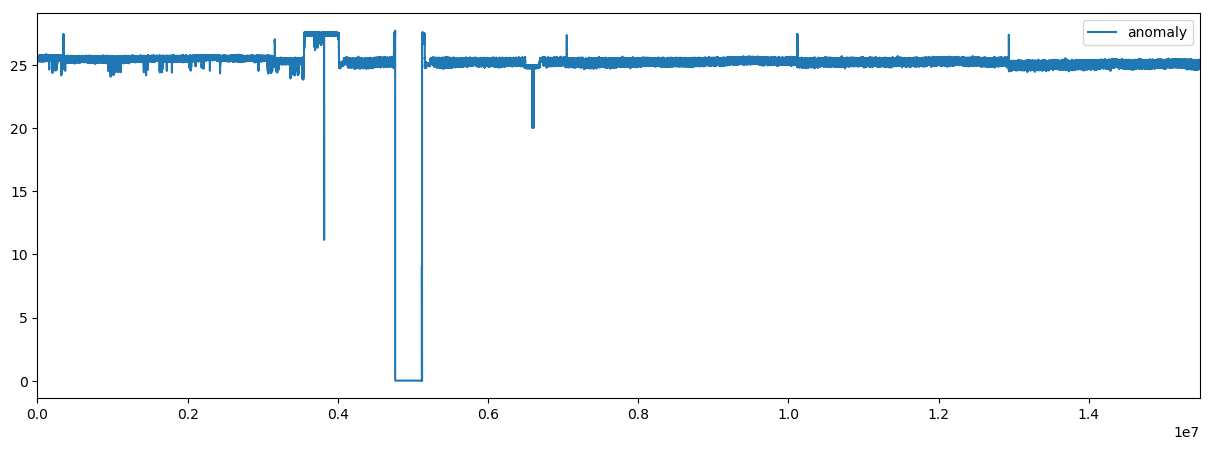

In [3]:
data_clean.plot()

In [4]:
data = data_clean.iloc[154000:157000]

In [5]:
data.head()

,anomaly
154000,25.592854
154001,25.519718
154002,25.578648
154003,25.645542
154004,25.570528


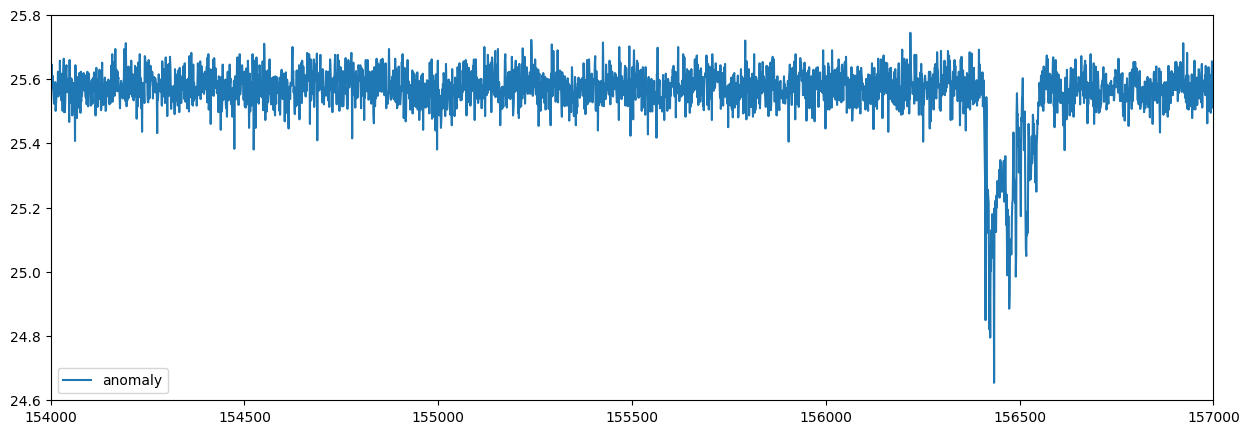

In [6]:
data.plot()

In [7]:
rng = np.random.RandomState(1)
model = TRCRP_Mixture(chains=1, lag=5, variables=data.columns, rng=rng)
model.incorporate(data)

In [8]:
model.resample_all(seconds=10)

[===                           ] 11.84%

Process Process-18:
Process Process-23:
Process Process-20:
Process Process-19:
Process Process-15:
Process Process-17:
Process Process-22:
Process Process-14:
Process Process-24:
Process Process-16:
Process Process-21:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 267, in _boots

KeyboardInterrupt: 

In [ ]:
model.resample_hyperparameters(seconds=10)

In [ ]:
probes = model.dataset.index
numsamples = 20
samples = model.simulate(probes, model.variables, numsamples)

In [ ]:
def plot_latent_state_sequence(timesteps, values, states, ax):
    assert len(timesteps) == len(states)
    unique = sorted(set(states))
    colors = matplotlib.cm.Set1(np.linspace(0, 1, len(unique)))
    y_low, y_high = ax.get_ylim()
    y_mid = np.mean([y_low, y_high])
    y_height = 0.05 * (y_high - y_low)
    for state, color in zip(unique, colors):
        xs = timesteps[states==state]
        for x in xs:
            ax.fill_between([x-1, x], [y_mid-y_height]*2, [y_mid+y_height]*2,
                alpha=0.3, color=color)

In [ ]:
def plot_predictions(simulations, variable, ax, states_from_chain=None):
    index = model.variables.index(variable)
    # Plot the observed data.
    x_observed = model.dataset.index
    y_observed = model.dataset.loc[:,variable]
    ax.plot(x_observed, y_observed, label=variable, color='k', linewidth=1)
    # Plot 25--75 percentile bands around the simulated data. 
    samples = simulations[:,:,index]
    ax.fill_between(
        probes,
        np.percentile(samples, 25, axis=0),
        np.percentile(samples, 75, axis=0),
        color='gray',
        alpha=0.5)
    #ax.set_ylim([min(y_observed)-2, max(y_observed)+2])
    #  Optionally plot latent temporal state at each timepoint,
    #  according to a given chain in the model.
    if states_from_chain is not None:
        assert 0 <= states_from_chain < model.chains
        states = model.get_temporal_regimes(variable)[states_from_chain]
        plot_latent_state_sequence(x_observed, y_observed, states, ax)
    # Add the legend.
    ax.legend(loc='upper left', handletextpad=0)

In [ ]:
fig, axes = plt.subplots(nrows=1)
plot_predictions(samples, 'eng_val', axes)
axes.set_xlim([min(probes), max(probes)])
fig.set_size_inches(20,10)

In [ ]:
chain = 0
samples_chain = samples[numsamples*chain:numsamples*(chain+1)]

In [ ]:
fig, axes = plt.subplots(nrows=1)
plot_predictions(samples_chain, 'eng_val', axes, states_from_chain=chain)
axes.set_xlim([min(probes), max(probes)])
fig.set_size_inches(20,10)

In [ ]:
probes = list(model.dataset.index) + range(max(model.dataset.index), max(model.dataset.index)+100)
numsamples = 20
samples = model.simulate(probes, model.variables, numsamples)

In [ ]:
fig, axes = plt.subplots(nrows=1)
plot_predictions(samples, 'eng_val', axes)
axes.set_xlim([min(probes), max(probes)])
fig.set_size_inches(20,10)

In [ ]:
%qtconsole